# Adaline

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [19]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:, 1], p[:, 2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi Step Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [20]:
def bipstep(y, th=0):
    return 1 if y >= th else -1

### b) Fungsi *Training* Adaline

Tulis kode ke dalam *cell* di bawah ini:

In [21]:
import sys


def adaline_fit(x, t, alpha=.1, max_err=.1, max_epoch=-1,
                verbose=False, draw=False):
    w = np.random.uniform(0, 1, len(x[0]) + 1)
    b = np.ones((len(x), 1))
    x = np.hstack((b, x))
    stop = False
    epoch = 0

    while not stop and (max_epoch == -1 or epoch < max_epoch):
        epoch += 1
        max_ch = -sys.maxsize

        if verbose:
            print('\nEpoch', epoch)

        for r, row in enumerate(x):
            y = np.dot(row, w)

            for i in range(len(row)):
                w_new = w[i] + alpha * (t[r] - y) * row[i]
                max_ch = max(abs(w[i] - w_new), max_ch)
                w[i] = w_new

            if verbose:
                print('Bobot:', w)

            if draw:
                plot(line(w), x, t)

        stop = max_ch < max_err

    return w

### c) Fungsi *Testing* Adaline

Tulis kode ke dalam *cell* di bawah ini:

In [22]:
def adaline_predict(X, w):
    Y = []

    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = bipstep(y_in)

        Y.append(y)

    return Y

### d) Fungsi Hitung Akurasi

Tulis kode ke dalam *cell* di bawah ini:

In [23]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    
    return sum(s) / len(a)

### e) Logika AND

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [0.51879259 0.50722995 0.63098529]


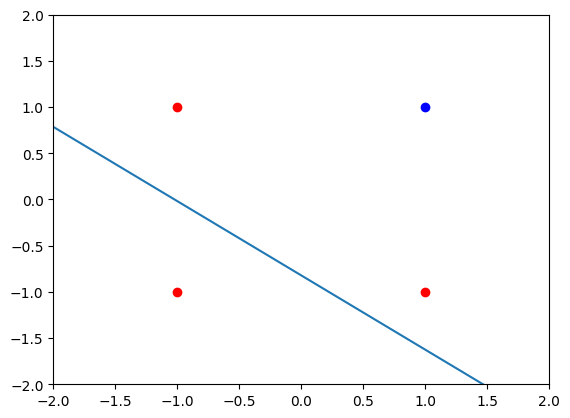

Bobot: [0.37928887 0.36772623 0.77048902]


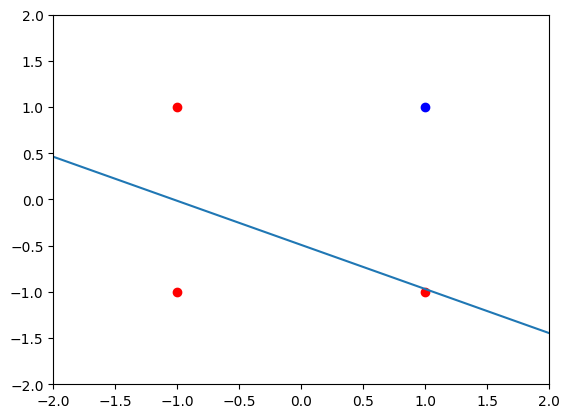

Bobot: [0.2010837  0.54593139 0.59228385]


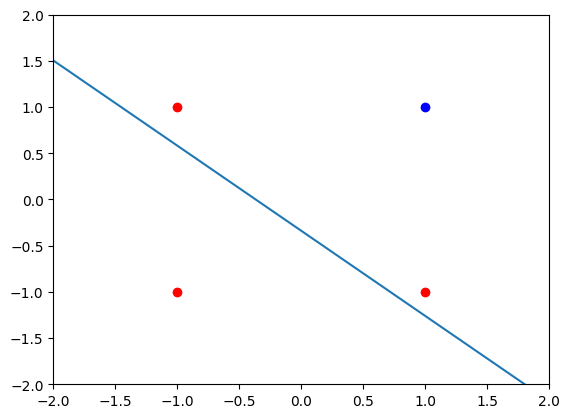

Bobot: [0.19479686 0.55221824 0.5985707 ]


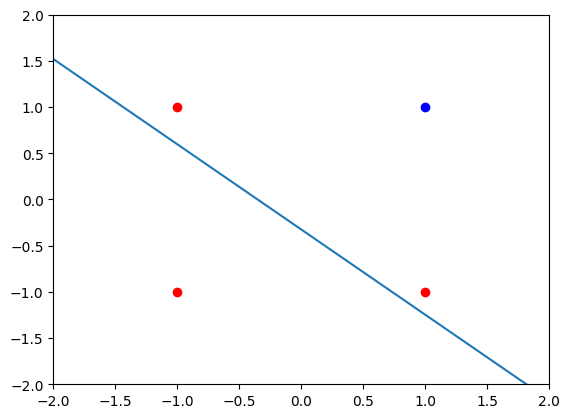


Epoch 2
Bobot: [0.16023828 0.51765966 0.56401212]


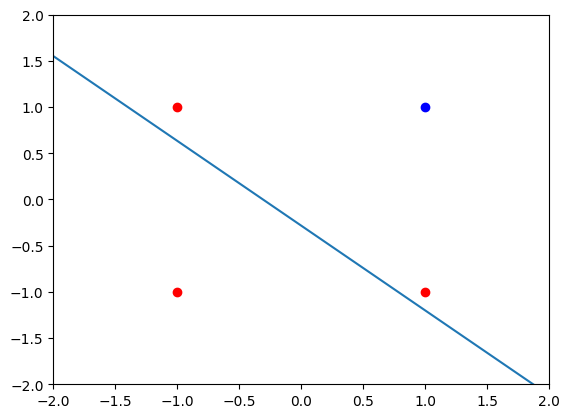

Bobot: [0.04884969 0.40627108 0.6754007 ]


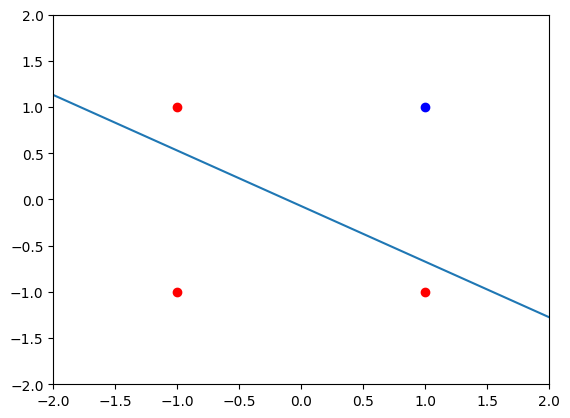

Bobot: [-0.08294824  0.53806901  0.54360277]


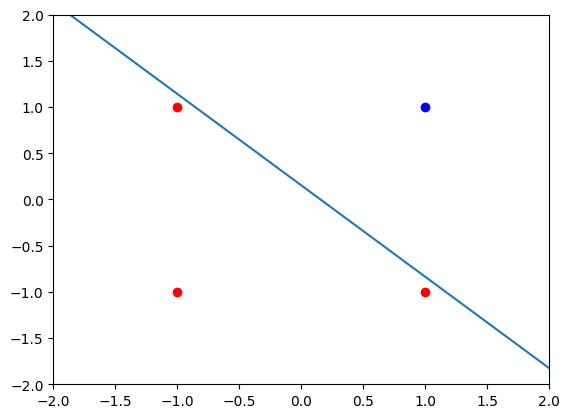

Bobot: [-0.06648624  0.52160701  0.52714077]


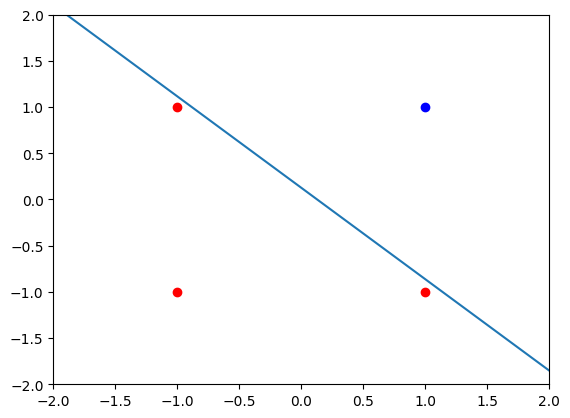


Epoch 3
Bobot: [-0.06471239  0.52338085  0.52891461]


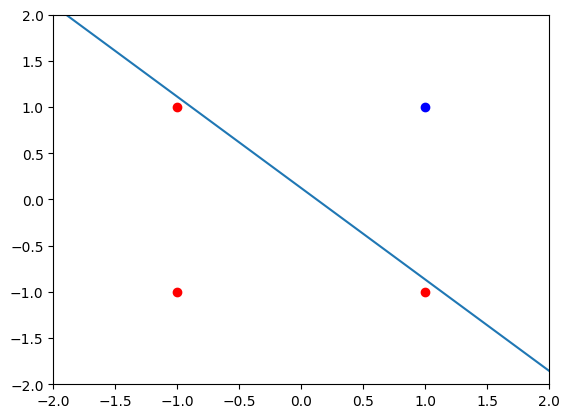

Bobot: [-0.15768777  0.43040547  0.62189   ]


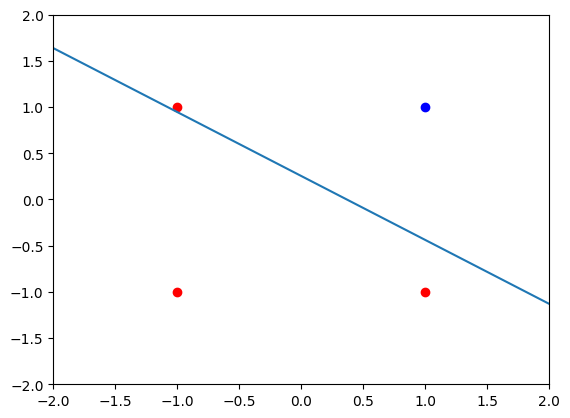

Bobot: [-0.26106745  0.53378514  0.51851032]


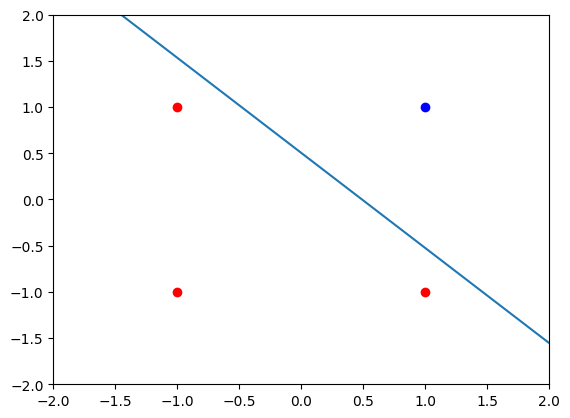

Bobot: [-0.22973116  0.50244885  0.48717403]


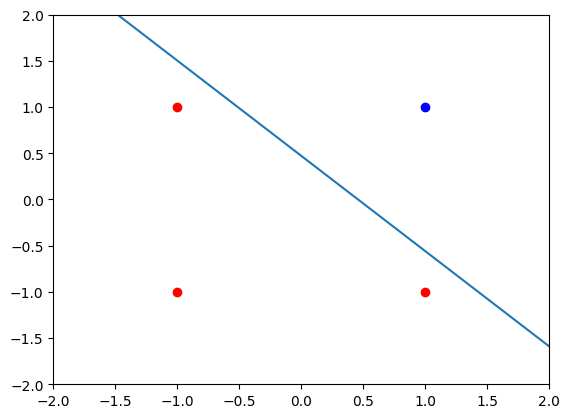


Epoch 4
Bobot: [-0.20572033  0.52645968  0.51118486]


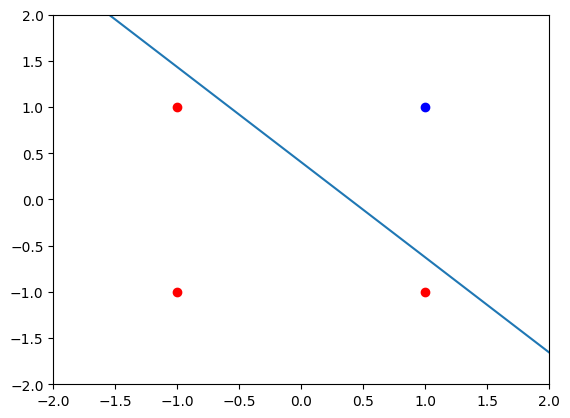

Bobot: [-0.28667578  0.44550423  0.59214031]


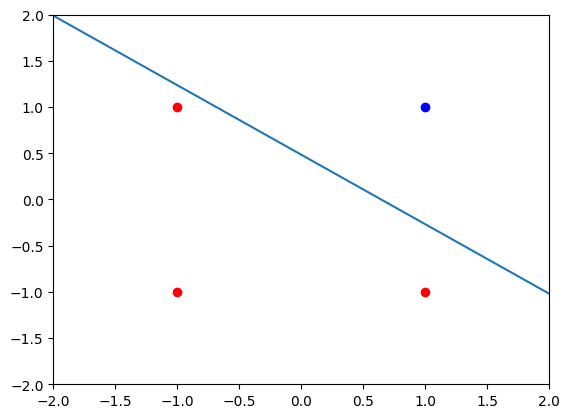

Bobot: [-0.37267181  0.53150026  0.50614428]


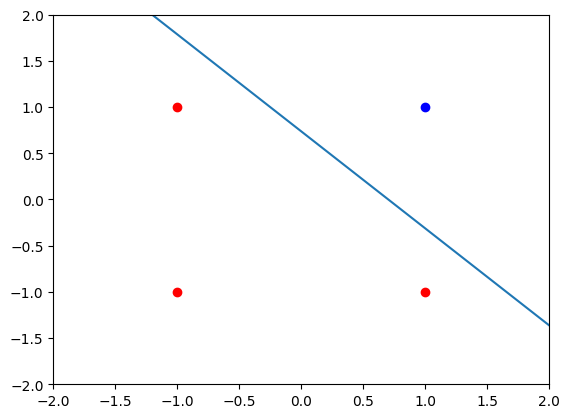

Bobot: [-0.33164017  0.49046863  0.46511264]


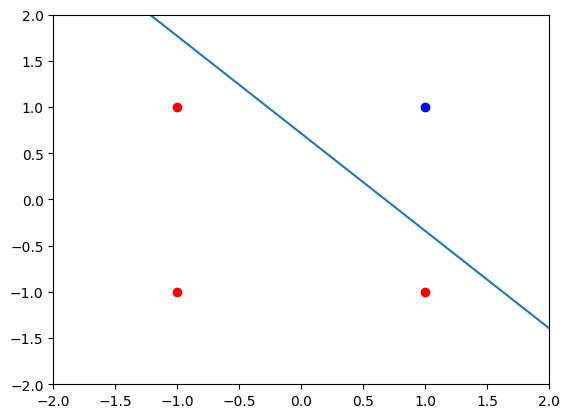

ValueError: too many values to unpack (expected 2)

In [24]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### f) Logika OR

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### g) Logika AND NOT

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### h) Logika XOR

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=False)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)